# Пересечение множества отрезков.

## Введение

   Даны $n$ отрезков. Вычислить множество кортежей отрезков, пересекающихся в одной точке.

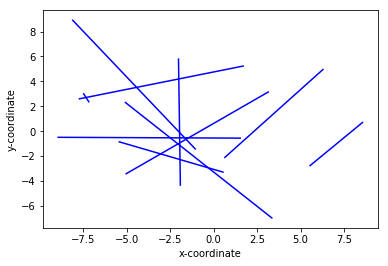

In [1]:
import notebook_helper

notebook_helper.intro()

## Решение №1

   Переберем все пары отрезков и добавим их точку пересечения, если она есть, в результирующее множество. Будем считать, что если отрезки пересекаются, то только в одной точке.

Correct solution


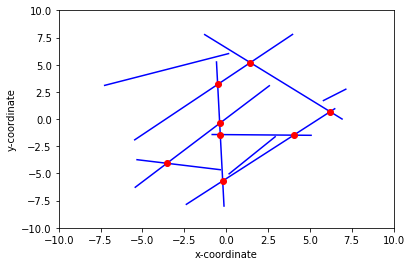

In [2]:
import bentley_ottman_helper
import notebook_helper

def segments_intersections_n2(segments):
    n = len(segments)
    intersection_points = []
    for i in range(n):
        for j in range(i + 1, n):
            if bentley_ottman_helper.do_intersect(segments[i], segments[j]):
                x = bentley_ottman_helper.intersection_point(segments[i], segments[j])
                intersection_points.append(x)
    return intersection_points

notebook_helper.silly_algorithm_testing(segments_intersections_n2, logging = False)

## Ассимптотика

Очевидно, данное решение работает за $\mathcal{O}(n^2)$ времени. Дополнительной памяти же тратится $\mathcal{O}(1)$, но если считать, что добавление каждой точки должно происходить один раз, то расходы памяти так же возрастут до $\mathcal{O}(n^2)$.

## Предикат "левый поворот"

Назовем положительную ориентацию левой, а отрицательную &ndash; правой (только соглашение; левая ориентация может не совпадать с интуитивным представлением при выборе другой системы координат).

Предикат "левый поворот" по набору точек определяет, верно ли, что их ориентация &ndash; левая.

$$ \begin{equation*}
turn(a, b, c) = 
 \begin{cases}
   1, &\text{если c лежит слева от направленного отрезка ab,}\\
   -1, &\text{если c лежит справа от направленного отрезка ab,}\\
   0, &\text{если три точки лежат на одной прямой.}
 \end{cases}
\end{equation*} $$

Предикат поворота задается следующим образом:

$$ turn(a, b, c) = sign((b - a) \times (c - a)) = sign 
\left( \begin{array}{cc}
  \left| \begin{array}{cc}
    b_x - a_x & c_x - a_x\\
   b_y - a_y & c_y - a_y
  \end{array} \right| 
\end{array} \right) $$


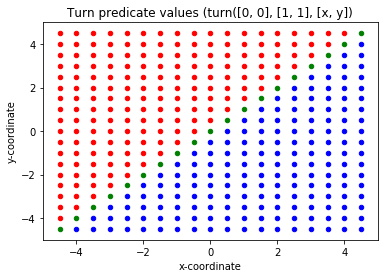

In [3]:
import notebook_helper

notebook_helper.show_turn_predicate()

# Пересечение двух отрезков.

Даны два отрезка координатами их концов $s_1 = (a, b)$, $s_2 = (a, b)$. Проверить, пересекаются ли они?

Если два отрезка не лежат на одной прямой, то необходимым и достаточным условием является то, что концы отрезка $s_1$ лежат по разные стороны относительно отрезка $s_2$ и наоборот. Иначе все предикаты будут равны 0, поэтому проверим их **AABB**(axis-aligned bounding box) на пересечение. Все это можно записать следующим образом:

$$ s_1 \cap s_2 \Longleftrightarrow 
\begin{equation}
 \begin{cases}
   turn(a, b, c) \cdot turn(a, b, d) \leqslant 0, &\text{ }\\
   turn(c, d, a) \cdot turn(c, d, b) \leqslant 0, &\text{ }\\
   AABB(s_1) \cap AABB(s_2) \ne \varnothing. &\text{ }
 \end{cases}
\end{equation} $$




In [4]:
import notebook_helper

def do_intersect(seg1, seg2):
    return bentley_ottman_helper.do_intersect(seg1, seg2)  #Заглушка

notebook_helper.intersection_checking_testing(do_intersect)


100  tests done
200  tests done
300  tests done
400  tests done
500  tests done
600  tests done
700  tests done
800  tests done
900  tests done
1000  tests done
Correct solution


## Задание

Реализовать нахождение множества пересечения двух отрезков. Вернуть надо отрезок пересечения или $None$, если они не пересекаются.


In [5]:
def segments_intersection_set(f, s):
    return bentley_ottman_helper.segments_intersection_set(f, s)


notebook_helper.segments_intersection_set_testing(segments_intersection_set)

100  tests done
200  tests done
300  tests done
400  tests done
500  tests done
600  tests done
700  tests done
800  tests done
900  tests done
1000  tests done
Correct solution


## Алгоритм Бентли-Отмана

 * Теперь научимся решать задачу о пересечении множества отрезков быстрее. Количество пересечений может быть квадрат и с этим ничего не поделаешь. Но если их сильно меньше, то предыдущий алгоритм будет не самым оптимальным


 ### Определения
 
 * Отношение $<$ на точках: $(x1, y1) < (x2, y2)$ $\equiv$ $x1 < x2$ or $x1 = x2$ and $y1 < y2$
     * т.е. лексикографический порядок
 * "Событие" ($event$)
     * Будет характеризоваться типом и точкой
         * Начало отрезка
         * Конец отрезка 
         * Пересечение отрезков 
     * Расширим отношение $<$ на точках для событий. При одинаковых точках события упорядочиваются следующим образом:
         * Событие начала
         * Событие пересечений
         * Событие конца 

### Цель 
* Ответом задачи является множество кортежей отрезков, пересекающихся в какой-то точке

## Решение

* Будем пользоватся методом сканирующей прямой
    * будем двигаться в порядке увеличения значения по абсцисе, а при равенстве по ординате
* Храним множество событий в каждый момент времени
    * Изначально все события начала и конца отрезков
* Итеративно обрабатываем события в порядке, заданным отношением $<$


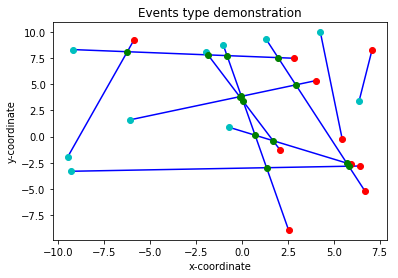

Iteration order
{-9.49, -1.92}
{-9.30, -3.30}
{-9.22, 8.31}
{-6.24, 8.10}
{-6.10, 1.60}
...


In [6]:
import notebook_helper

notebook_helper.show_events_handle_order(logging = False)

## Решение 
* Будем поддерживать набор отрезков $sortedSegSet_{x_i, y_i}$ такие, что:
    * обработали событие начала
    * еще не обработали событие конца
* В момент времени $x_i$, набор будет упорядочен по значению $y_{seg_j}(x_i)$
    * т. е. по значению $y$-координаты отрезков в точке $x_i$. 
* $ind_f(s)$ &ndash; упорядоченный номер элемента $f$ в множестве $s$

##### Примеры состояний  множества $sortedSegSet$
![Intersected segments set state](images/2.png)


## Теорема

* $(x_i, y_i)$ &ndash; момент времени
* $sortedSegSet_{x_i, y_i}$ &ndash; отсортированный набор отрезков в момент времени $x_{i}, y_{i}$
* $e_{l}$, $e_{r}$ &ndash; такие события, что:
    * $e_{l} \le (x_i, y_i) \lt e_{r}$ 
    * $\forall j : e_j \le e_{l} \vee e_{r} \le e_j$
        * т.е. $e_l$ и $e_r$ &ndash; два последовательных события, происходящие в разные моменты времени.
        
* Тогда для любого момента времени $(x_k, y_k)$, $(x_i, y_i) \lt (x_k, y_k) \lt e_r$ выполняются: 
    1. $seg \in sortedSegSet_{x_k, y_k} \iff seq \in sortedSegSet_{x_i, y_i}$ 
    2. $sortedSegSet_{x_k, y_k}=sortedSegSet_{x_i, y_i}$


## Доказательство:
$\triangleright$
<div style="padding-left:40px">

<ol>
<li> Так как $\nexists e: e$ &ndash; событие, $(x_i, y_i) \le e \le (x_k, y_k)$, то значит в множество $sortedSegSet_{x_i, y_i}$ ничего не добавляли и не удаляли. </li>
<li> Будем доказывать от противного. Рассмотрим два отрезка $f$, $s$, что:
$ind_f(sortedSegSet_{x_i, y_i}) \lt ind_s(sortedSegSet_{x_i, y_i})$, $ind_f(sortedSegSet_{x_k, y_k}) \gt ind_s(sortedSegSet_{x_k, y_k})$. Это значит, что отрезки $f$ и $s$ пересекаются в точке $(x_t, y_t)$: $(x_i, y_i) \le (x_t, y_t) \le (x_k, y_k)$. Но по условию теоремы такого события не существует, а значит мы пришли к противоречию. </li>
</ol>
</div>

$\triangleleft$

## Теорема

* $e_n$ &ndash; событие пересечения в точке $(p_x, p_y)$, только что взятое из очереди

* Тогда $\nexists i, j, k$ таких, что:
    
    * $i \lt j \lt k$
    * $(sortedSegSet_i, sortedSegSet_j)$ не пересекаются в точке $(p_x, p_y)$
    * $(sortedSegSet_j, sortedSegSet_k)$ не пересекаются в точке $(p_x, p_y)$
    * $(sortedSegSet_i, sortedSegSet_k)$ пересекаются в точке $(p_x, p_y)$

## Доказательство:

$\triangleright$
<div style="padding-left:40px">

Рассмотрим сужение $sortedSegSet$ до множества $\{sortedSegSet_i, sortedSegSet_j, sortedSegSet_k\}$. Тогда после обработки точки пересечения $(p_x, p_y)$, порядок между $sortedSegSet_i$ и $sortedSegSet_k$  изменится. Результирующее суженное множестве $sortedSegSet$ может иметь три вида:
<ol>
<li> $\{sortedSegSet_k, sortedSegSet_i, sortedSegSet_j\}$ &ndash; тогда отрезки $j$, $k$ должны пересекаться </li>
<li> $\{sortedSegSet_k, sortedSegSet_j, sortedSegSet_i\}$ &ndash; тогда отрезки $i$, $k$ должны пересекаться </li>
<li> $\{sortedSegSet_j, sortedSegSet_k, sortedSegSet_i\}$ &ndash; тогда пары отрезков $i$, $k$ и $j$, $k$ должны пересекаться </li>
</ol>
</div>

$\triangleleft$

## Теорема:

Достаточно рассматривать пересечения только соседних отрезков $sortedSegSet$, чтобы все события пересечений были обработаны.


## Доказательство
$\triangleright$
<div style="padding-left:40px">
    Докажем от противного.
    <ul>
    <li> $p$ &ndash; первая необработанная точка </li>
    <li> $s_1$, $s_2$ &ndash; отрезки, пересекающиеся в точке $p = (p_x, p_y)$ </li>
        <ul>
            <li> Тогда $s_1$, $s_2$ $\in sortedSegSet_{p_x, p_y}$ </li>
            <li> $i=ind_{s_1}(sortedSegSet)$, $j=ind_{s_2}(sortedSegSet)$, $i + 1 < j$ </li>
        </ul>
    <li> $s = sortedSegSet_k$, что $i < k < j$ </li>
    </ul>

Тогда отрезки $s_1$, $s_2$, $s$ пересекаются в точке $p$. Пусть это не так. Тогда верно одно из следующих утверждений:
    <ul>
      <li> Конец $s$ меньше $p$, но тогда $s \notin sortedSegSet$ </li>
      <li> $s$ пересекается с $s_1$, но тогда $k < i$ </li>
      <li> $s$ пересекается c $s_2$, но тогда $k > j$ </li>
    </ul>

Мы пришли к противоречию, а значит $p$ была обработана.

</div>
$\triangleleft$


## Следствие:

* $e$ &ndash; событие пересечения
* $intersecting$ &ndash; сужение множества $sortedSegSet$ на отрезки, покрывающие точку события $e$
    * С сохранением порядка

Тогда $intersecting$ является подотрезком множества $sortedSegSet$

## Решение 

* Следствие последней теоремы позволяет нам рассматривать точки пересечения только соседних отрезков из $sortedSegSet$. Это значит, что количество событий пересения в любой момент времени не будет превыщать количества отрезков

* Обрабатываем событие начала или конца отрезка, так же добавив или удалив некоторые события пересения из множества событий 
    * После добавления и удаления пары отрезков, которые были соседями, могут перестать быть таковыми и наоборот
* При событии пересечения перевернем соответствующий подотрезок $sortedSegSet$

## Теорема

* $e$ &ndash; событие пересечения
* $intersecting$ &ndash; сужение множества $sortedSegSet$ на отрезки, покрывающие точку события $e$
    * С сохранением порядка

* Тогда после обработки события $e$ $reversed(intersecting)$ будет подотрезком $sortedSegSet$

### Доказательство &ndash; упражнение

### Подсказка:

Рассмотреть определение $sortedSegSet$, угол наклона и монотонность прямых, соответствующих отрезкам


## Асимптотика

### Perfomance

* Очередь событий &ndash; сбалансированное дерево с добавлением и удалением за $\mathcal{O}(\log{}n)$
* Количество событий равно $n + k$, где $k$ &ndash; количество точек пересечений
    * Каждое событие &ndash; константное число операций с $sortedSegSet$
* $sortedSegSet$ &ndash; структура данных с добавлением, удалением и переворотом подотрезка за $\mathcal{O}(\log{}n)$ операций на запрос (Например: декартового дерева) 
* Итого: $\mathcal{O}((n + k)\cdot \log{}n)$. 

### Memory
* Количество элементов в очереди $\le 2n + (n-1) = 3n- 1$
    * $\le n$ событий начал
    * $\le n$ событий концов
    * $\le n-1$ событий пересечения так, как можно удалять добавленные ранее события пересечений из очереди, если отрезки перестали быть соседними.
* Итого: $\mathcal{O}(n)$
